# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split

# Loading the dataset

In [2]:
df = pd.read_csv("D:/anaconda/Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished


In [3]:
df.shape

(545, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  furnishingstatus  545 non-null    object
dtypes: int64(6), object(6)
memory usage: 51.2+ KB


# Handling Missing values

In [5]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64

In [6]:
# We don't have any missing values

# Visualizations



> Univariate Analysis



C:\Users\PAVITHRA\AppData\Local\Temp\ipykernel_22820\719166114.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


Text(0.5, 1.0, 'Price Distribution plot')

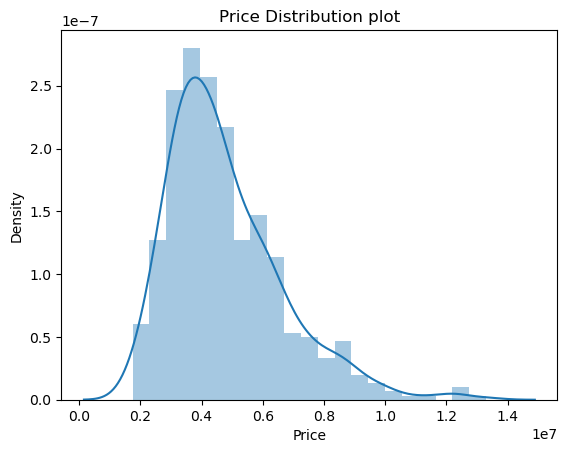

In [6]:
sns.distplot(df['price'])
plt.xlabel("Price")
plt.title("Price Distribution plot")

([<matplotlib.patches.Wedge at 0x1775a2cd8d0>,
 [Text(-0.6022016005293036, 0.9205179152628944, 'AC Houses'),
  Text(0.6022016005293035, -0.9205179152628945, 'Non AC Houses')],
 [Text(-0.32847360028871103, 0.5021006810524877, '68.44%'),
  Text(0.3284736002887109, -0.5021006810524878, '31.56%')])

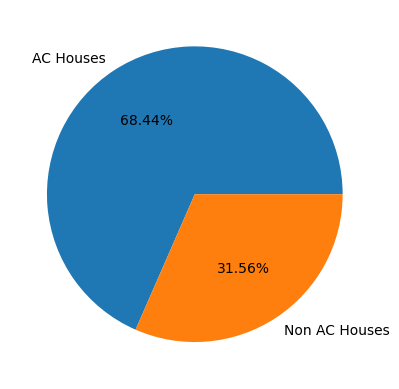

In [7]:
plt.pie(df['airconditioning'].value_counts(),labels=['AC Houses','Non AC Houses'],autopct="%.2f%%")

# Nowadays AC is a very much needed thing so probably house with AC has more prices let's check in bar plot



> Bivariate Analysis



<BarContainer object of 545 artists>

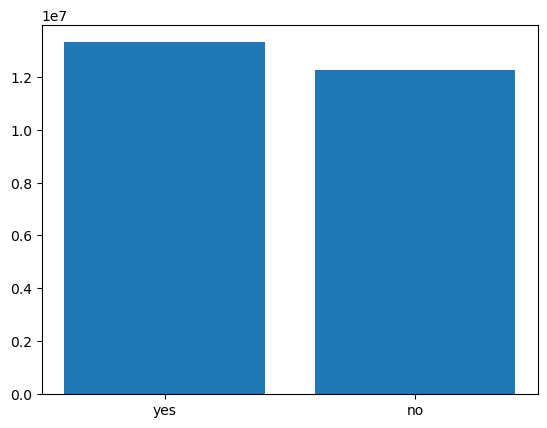

In [8]:
plt.bar(df['airconditioning'],df['price']) 

<BarContainer object of 545 artists>

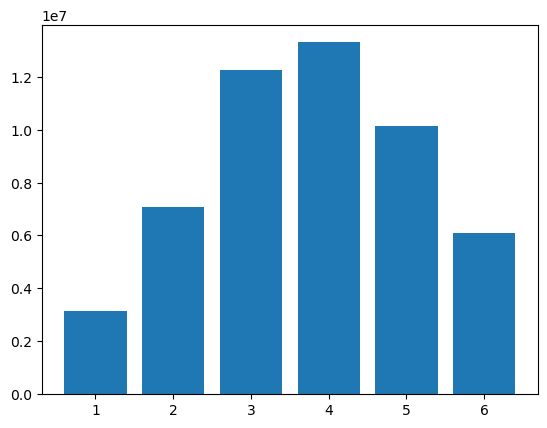

In [10]:
plt.bar(df['bedrooms'],df['price']) # Here the highest price is for 4 beds then its decreasing for 6 beds

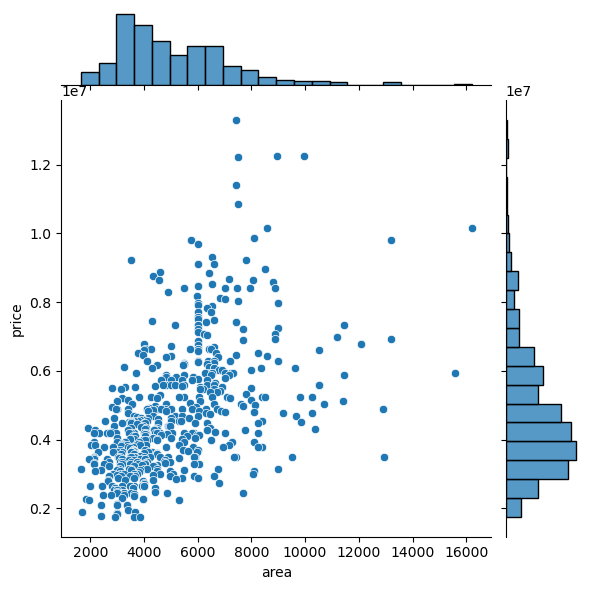

In [11]:
sns.jointplot(data=df,x='area',y='price')

#If area of house is 6000 to 12000 we have high prices after thean 



> Multivariate Analysis



In [13]:
corr_df = pd.read_csv("D:/anaconda/Housing.csv")
LE = LabelEncoder()
a = corr_df.iloc[:,[5,6,7,8,9,11]]

for column in a:
    corr_df[column] = LE.fit_transform(corr_df[column])

#Duplicate dataset to apply encoding and find correlation

<Axes: >

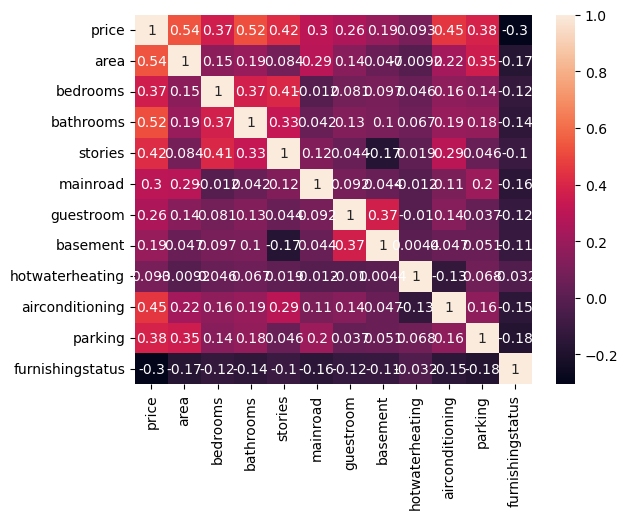

In [14]:
sns.heatmap(corr_df.corr(),annot=True)

# Here I performed encoding to find the correlation of the categorical variables too with the price
# We found out that area>bathrooms>ac>stories are the correlation order for price so these variable are a important one 

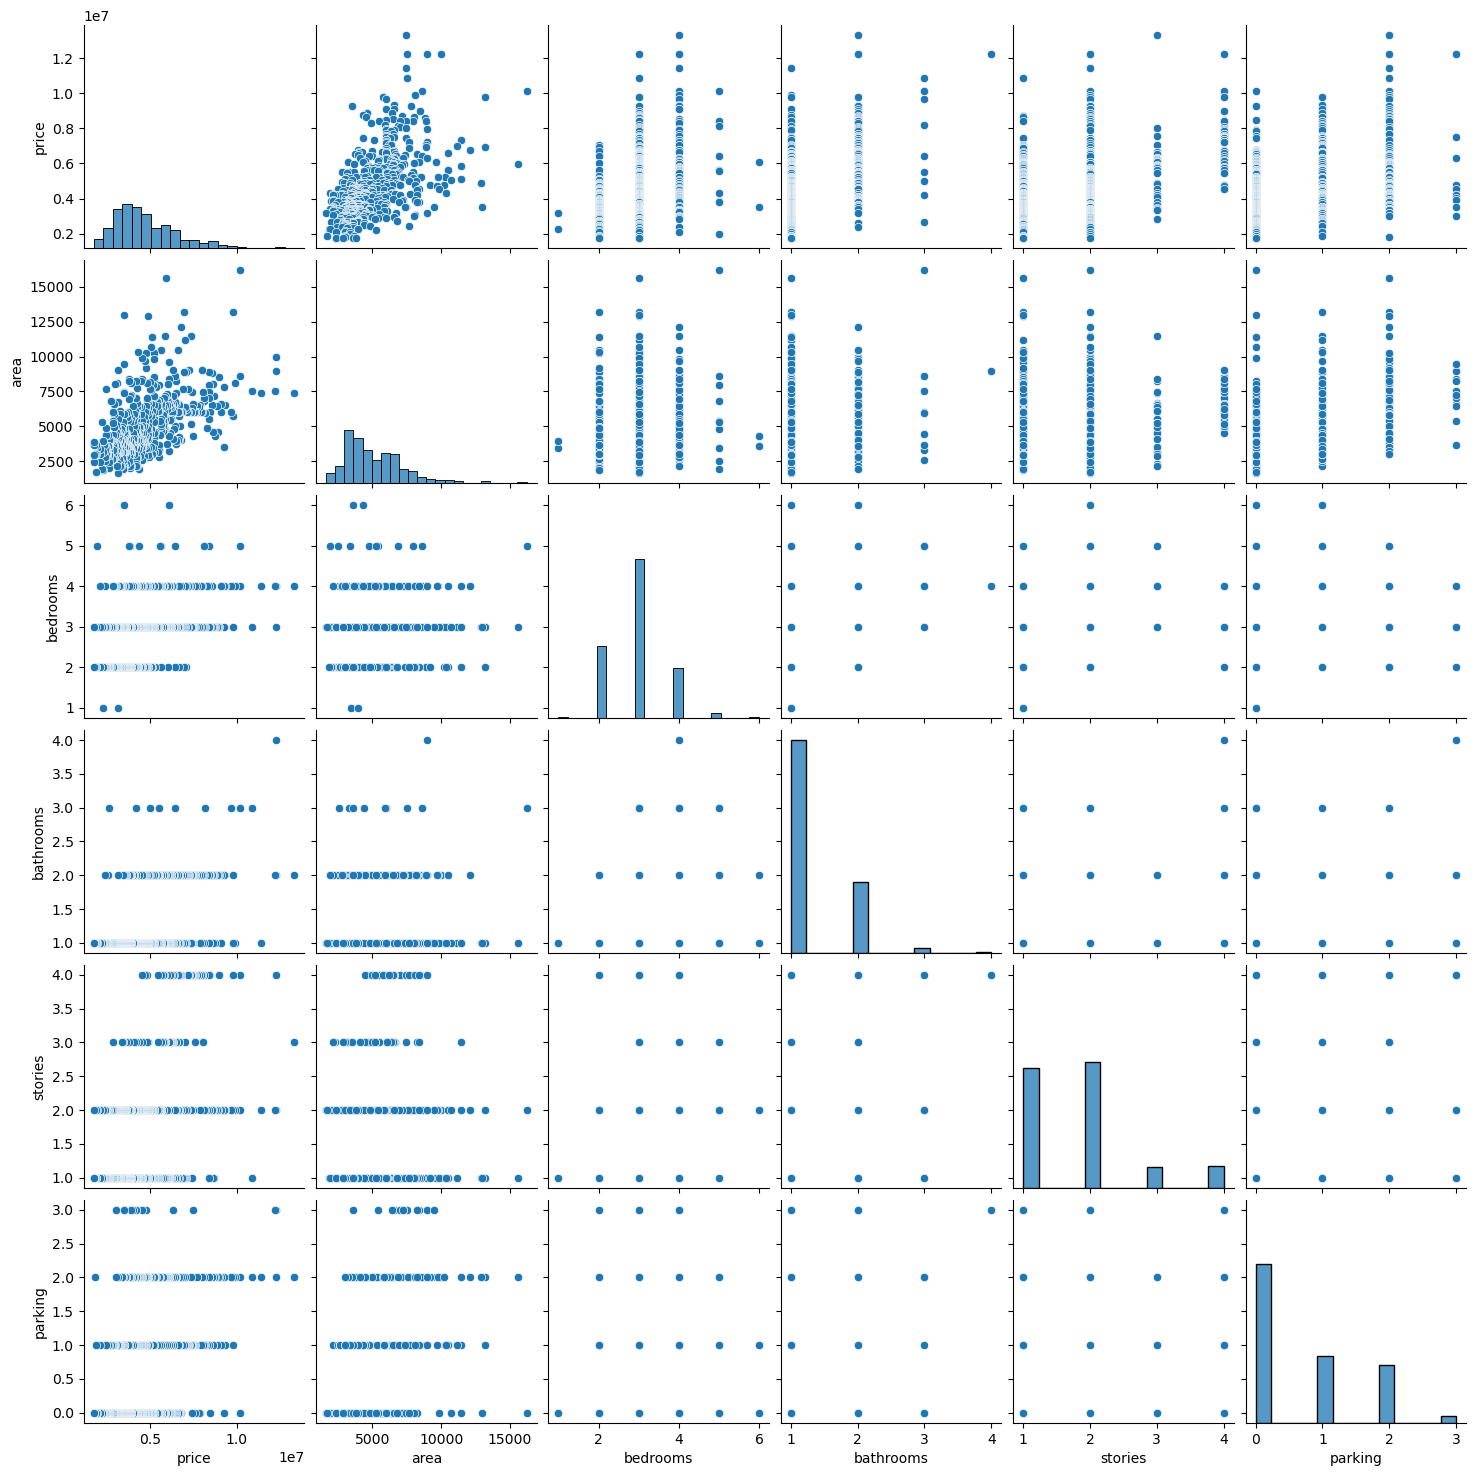

In [15]:
sns.pairplot(df)

# 4 bedrooms have high price and no bedrooms and 6 bedrooms have low price
# 2 bathrooms have high price and we can't find the lower price because every number has equal prices
# 2 and 4 stories have high price even though we have a high price for 3 story but its an outlier and low price for 1 story
# 2 parking space have high price and no parking space has low price

# Descriptive Statistics

We'll take only the numerical columns for the descriptive analysis for some functions so we'll create a new dataframe named df1 containg only numerical columns

In [16]:
df1 = df.iloc[:,[0,1,2,3,4,10]]
df1.head()

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2


In [17]:
df1.mean()

price        4.766729e+06
area         5.150541e+03
bedrooms     2.965138e+00
bathrooms    1.286239e+00
stories      1.805505e+00
parking      6.935780e-01
dtype: float64

In [18]:
df1.median()

price        4340000.0
area            4600.0
bedrooms           3.0
bathrooms          1.0
stories            2.0
parking            0.0
dtype: float64

In [19]:
df.mode()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,3500000,6000.0,3.0,1.0,2.0,yes,no,no,no,no,0.0,semi-furnished
1,4200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df.max()

price                  13300000
area                      16200
bedrooms                      6
bathrooms                     4
stories                       4
mainroad                    yes
guestroom                   yes
basement                    yes
hotwaterheating             yes
airconditioning             yes
parking                       3
furnishingstatus    unfurnished
dtype: object

In [21]:
df.min()

price                 1750000
area                     1650
bedrooms                    1
bathrooms                   1
stories                     1
mainroad                   no
guestroom                  no
basement                   no
hotwaterheating            no
airconditioning            no
parking                     0
furnishingstatus    furnished
dtype: object

In [22]:
df.var()

C:\Users\PAVITHRA\AppData\Local\Temp\ipykernel_22820\1568254755.py:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.var()


price        3.498544e+12
area         4.709512e+06
bedrooms     5.447383e-01
bathrooms    2.524757e-01
stories      7.525432e-01
parking      7.423300e-01
dtype: float64

In [23]:
df.std()

C:\Users\PAVITHRA\AppData\Local\Temp\ipykernel_22820\3390915376.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.std()


price        1.870440e+06
area         2.170141e+03
bedrooms     7.380639e-01
bathrooms    5.024696e-01
stories      8.674925e-01
parking      8.615858e-01
dtype: float64

In [24]:
quantile = df1.quantile(q=[0.25,0.75])
quantile

,price,area,bedrooms,bathrooms,stories,parking
0.25,3430000.0,3600.0,2.0,1.0,1.0,0.0
0.75,5740000.0,6360.0,3.0,2.0,2.0,1.0


In [25]:
IQR = quantile.iloc[1]-quantile.iloc[0]
upper_extreme = quantile.iloc[1]+(1.5*IQR)
upper_extreme

price        9205000.0
area           10500.0
bedrooms           4.5
bathrooms          3.5
stories            3.5
parking            2.5
dtype: float64

In [26]:
lower_extreme = quantile.iloc[0]-(1.5*IQR)
lower_extreme

price       -35000.0
area          -540.0
bedrooms         0.5
bathrooms       -0.5
stories         -0.5
parking         -1.5
dtype: float64

In [27]:
df.skew()

C:\Users\PAVITHRA\AppData\Local\Temp\ipykernel_22820\1665899112.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


price        1.212239
area         1.321188
bedrooms     0.495684
bathrooms    1.589264
stories      1.082088
parking      0.842062
dtype: float64

In [28]:
df.kurt()

C:\Users\PAVITHRA\AppData\Local\Temp\ipykernel_22820\1257127604.py:1: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.kurt()


price        1.960130
area         2.751480
bedrooms     0.728323
bathrooms    2.164856
stories      0.679404
parking     -0.573063
dtype: float64

In [29]:
corr_df.corr()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,-0.304721
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,-0.171445
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,-0.123244
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,-0.143559
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,-0.104672
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,-0.156726
guestroom,0.255517,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,-0.118328
basement,0.187057,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,-0.112831
hotwaterheating,0.093073,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.031628
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,-0.150477


In [30]:
df['bathrooms'].value_counts()

1    401
2    133
3     10
4      1
Name: bathrooms, dtype: int64

In [31]:
df['parking'].value_counts()

0    299
1    126
2    108
3     12
Name: parking, dtype: int64

# Outliers

<Axes: >

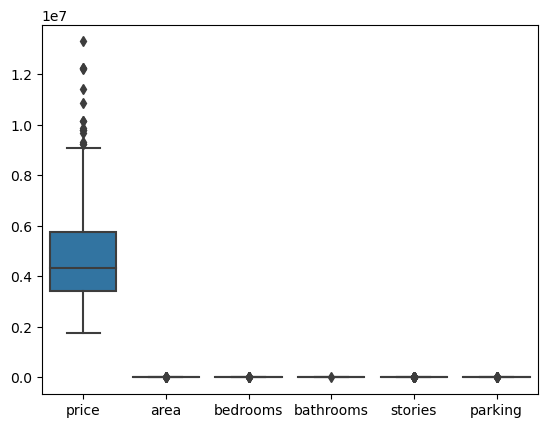

In [32]:
sns.boxplot(df)

In [33]:
for column in ['price','area']:
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3-Q1
  l_e = Q1 - (1.5*IQR)
  u_e = Q1 + (1.5*IQR)
  df[column] = np.where(df[column]>u_e,u_e,np.where(df[column]<l_e,l_e,df[column]))

# Removing outliers only for area and price 

<Axes: >

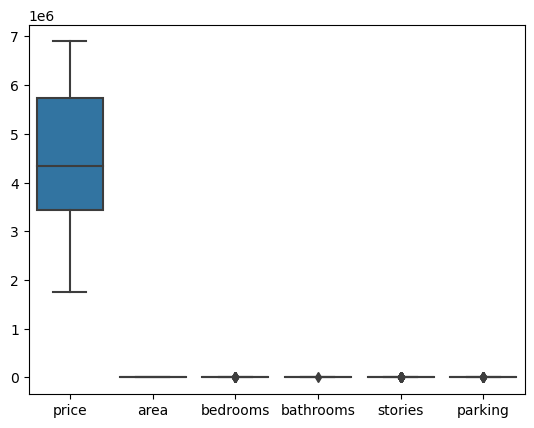

In [34]:
sns.boxplot(df) # Outliers on Area and Price removed

# Encoding

In [35]:
LE = LabelEncoder()
xf = df.iloc[:,[5,6,7,8,9,11]].columns
for column in xf:
  df[column] = LE.fit_transform(df[column])
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,6895000.0,7420.0,4,2,3,1,0,0,0,1,2,0
1,6895000.0,7740.0,4,4,4,1,0,0,0,1,3,0
2,6895000.0,7740.0,3,2,2,1,0,1,0,0,2,1
3,6895000.0,7500.0,4,2,2,1,0,1,0,1,3,0
4,6895000.0,7420.0,4,1,2,1,1,1,0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000.0,3000.0,2,1,1,1,0,1,0,0,2,2
541,1767150.0,2400.0,3,1,1,0,0,0,0,0,0,1
542,1750000.0,3620.0,2,1,1,1,0,0,0,0,0,2
543,1750000.0,2910.0,3,1,1,0,0,0,0,0,0,0


In [36]:
df.info() #no more object dtype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             545 non-null    float64
 1   area              545 non-null    float64
 2   bedrooms          545 non-null    int64  
 3   bathrooms         545 non-null    int64  
 4   stories           545 non-null    int64  
 5   mainroad          545 non-null    int32  
 6   guestroom         545 non-null    int32  
 7   basement          545 non-null    int32  
 8   hotwaterheating   545 non-null    int32  
 9   airconditioning   545 non-null    int32  
 10  parking           545 non-null    int64  
 11  furnishingstatus  545 non-null    int32  
dtypes: float64(2), int32(6), int64(4)
memory usage: 38.4 KB


# Split the data into dependent and independent variable

In [37]:
x = df.iloc[:,1:].values  # Except 1st column (all columns except price)
y = df.iloc[:,0].values   # Only 1st column (only price)

In [38]:
x

array([[7.42e+03, 4.00e+00, 2.00e+00, ..., 1.00e+00, 2.00e+00, 0.00e+00],
       [7.74e+03, 4.00e+00, 4.00e+00, ..., 1.00e+00, 3.00e+00, 0.00e+00],
       [7.74e+03, 3.00e+00, 2.00e+00, ..., 0.00e+00, 2.00e+00, 1.00e+00],
       ...,
       [3.62e+03, 2.00e+00, 1.00e+00, ..., 0.00e+00, 0.00e+00, 2.00e+00],
       [2.91e+03, 3.00e+00, 1.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [3.85e+03, 3.00e+00, 1.00e+00, ..., 0.00e+00, 0.00e+00, 2.00e+00]])

In [39]:
y

array([6895000., 6895000., 6895000., 6895000., 6895000., 6895000.,
       6895000., 6895000., 6895000., 6895000., 6895000., 6895000.,
       6895000., 6895000., 6895000., 6895000., 6895000., 6895000.,
       6895000., 6895000., 6895000., 6895000., 6895000., 6895000.,
       6895000., 6895000., 6895000., 6895000., 6895000., 6895000.,
       6895000., 6895000., 6895000., 6895000., 6895000., 6895000.,
       6895000., 6895000., 6895000., 6895000., 6895000., 6895000.,
       6895000., 6895000., 6895000., 6895000., 6895000., 6895000.,
       6895000., 6895000., 6895000., 6895000., 6895000., 6895000.,
       6895000., 6895000., 6895000., 6895000., 6895000., 6895000.,
       6895000., 6895000., 6895000., 6895000., 6895000., 6895000.,
       6895000., 6895000., 6860000., 6790000., 6790000., 6755000.,
       6720000., 6685000., 6650000., 6650000., 6650000., 6650000.,
       6650000., 6650000., 6629000., 6615000., 6615000., 6580000.,
       6510000., 6510000., 6510000., 6475000., 6475000., 64400

# Train Test Split

In [40]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [41]:
x_train.shape

(436, 11)

In [42]:
x_test.shape

(109, 11)

In [43]:
y_train.shape

(436,)

In [44]:
y_test.shape

(109,)

In [45]:
x_train

array([[3.62e+03, 2.00e+00, 1.00e+00, ..., 0.00e+00, 0.00e+00, 2.00e+00],
       [4.00e+03, 2.00e+00, 1.00e+00, ..., 0.00e+00, 0.00e+00, 2.00e+00],
       [3.04e+03, 2.00e+00, 1.00e+00, ..., 0.00e+00, 0.00e+00, 2.00e+00],
       ...,
       [5.75e+03, 3.00e+00, 2.00e+00, ..., 1.00e+00, 1.00e+00, 2.00e+00],
       [3.60e+03, 3.00e+00, 1.00e+00, ..., 0.00e+00, 1.00e+00, 2.00e+00],
       [6.60e+03, 3.00e+00, 1.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00]])

In [46]:
x_test

array([[4.00e+03, 3.00e+00, 1.00e+00, ..., 0.00e+00, 1.00e+00, 0.00e+00],
       [7.74e+03, 3.00e+00, 1.00e+00, ..., 0.00e+00, 2.00e+00, 0.00e+00],
       [3.46e+03, 4.00e+00, 1.00e+00, ..., 1.00e+00, 0.00e+00, 1.00e+00],
       ...,
       [6.06e+03, 2.00e+00, 1.00e+00, ..., 0.00e+00, 1.00e+00, 1.00e+00],
       [4.50e+03, 2.00e+00, 1.00e+00, ..., 0.00e+00, 1.00e+00, 1.00e+00],
       [6.10e+03, 3.00e+00, 2.00e+00, ..., 0.00e+00, 2.00e+00, 0.00e+00]])

In [47]:
y_train

array([1750000., 2695000., 2870000., 2590000., 4515000., 4410000.,
       4585000., 5250000., 3570000., 3640000., 6895000., 2940000.,
       6083000., 3255000., 4893000., 3150000., 2975000., 6895000.,
       3500000., 5880000., 3500000., 4235000., 3710000., 4060000.,
       2345000., 4550000., 6895000., 3640000., 2660000., 2233000.,
       2135000., 4277000., 6230000., 6300000., 3920000., 6895000.,
       6895000., 5215000., 6895000., 6230000., 4900000., 4550000.,
       4060000., 3010000., 6895000., 5600000., 6895000., 6895000.,
       6895000., 3780000., 2940000., 2653000., 3836000., 4760000.,
       6895000., 3143000., 3500000., 4690000., 4340000., 4515000.,
       1767150., 3080000., 5950000., 5530000., 3150000., 6895000.,
       2800000., 3045000., 2835000., 1820000., 3465000., 4200000.,
       5040000., 6895000., 5250000., 4690000., 4900000., 5495000.,
       1750000., 6895000., 3675000., 6895000., 3920000., 4550000.,
       2275000., 6895000., 6650000., 6895000., 5250000., 64050

In [48]:
y_test

array([4585000., 6083000., 4007500., 6895000., 2940000., 6195000.,
       3535000., 2940000., 3500000., 6895000., 6755000., 3990000.,
       3150000., 3290000., 4130000., 2660000., 4410000., 3710000.,
       3360000., 4270000., 5005000., 5383000., 6440000., 1890000.,
       6125000., 5460000., 5803000., 4620000., 5530000., 5950000.,
       4305000., 3640000., 5250000., 3325000., 3703000., 4753000.,
       6895000., 3500000., 3150000., 4270000., 6895000., 4060000.,
       5740000., 3129000., 3633000., 6895000., 4620000., 3290000.,
       4165000., 6650000., 4165000., 4690000., 3150000., 3850000.,
       3290000., 5075000., 6510000., 5740000., 3780000., 4795000.,
       4900000., 5460000., 3500000., 6895000., 2835000., 5495000.,
       6895000., 4200000., 4200000., 4900000., 3332000., 6195000.,
       4098500., 6650000., 3885000., 4620000., 1960000., 6440000.,
       1750000., 3605000., 3290000., 4970000., 4613000., 3850000.,
       3500000., 6107500., 3780000., 4900000., 3570000., 43400

# Feature Scaling

In [49]:
SS = StandardScaler()
x_train = SS.fit_transform(x_train)
x_test = SS.fit_transform(x_test)

In [50]:
x_train 

array([[-0.80697588, -1.29437561, -0.57330726, ..., -0.69135093,
        -0.81914879,  1.18364739],
       [-0.57711573, -1.29437561, -0.57330726, ..., -0.69135093,
        -0.81914879,  1.18364739],
       [-1.15781505, -1.29437561, -0.57330726, ..., -0.69135093,
        -0.81914879,  1.18364739],
       ...,
       [ 0.48145073,  0.05251643,  1.4755613 , ...,  1.44644342,
         0.32555914,  1.18364739],
       [-0.81907378,  0.05251643, -0.57330726, ..., -0.69135093,
         0.32555914,  1.18364739],
       [ 0.99561159,  0.05251643, -0.57330726, ..., -0.69135093,
        -0.81914879, -1.44936416]])

In [51]:
x_test

array([[-0.50670003,  0.02560738, -0.56354451, ..., -0.63042517,
         0.49214421, -1.25628441],
       [ 1.55581952,  0.02560738, -0.56354451, ..., -0.63042517,
         1.73967255, -1.25628441],
       [-0.80449697,  1.42120937, -0.56354451, ...,  1.58623108,
        -0.75538413,  0.07318162],
       ...,
       [ 0.62934015, -1.36999462, -0.56354451, ..., -0.63042517,
         0.49214421,  0.07318162],
       [-0.23096212, -1.36999462, -0.56354451, ..., -0.63042517,
         0.49214421,  0.07318162],
       [ 0.65139918,  0.02560738,  1.2431129 , ..., -0.63042517,
         1.73967255, -1.25628441]])

# Model Building

Our target varible is a numeric one so we shall do the regression here I have tried all the regression models namely


1.   Multilinear Regression
2.   Polynomial Regression
3.   Support Vector Regression
4.   Decision Tree Regression
5.   Random Forest Regression
6.   Lasso Regression
7.   Ridge Regression





> # Linear Regression



In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
LR = LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [53]:
y_predMLR = LR.predict(x_test)

In [54]:
r2_score(y_test,y_predMLR) 

0.6542187859103437


> # Polynomial Regression



In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
PF = PolynomialFeatures(degree=4)
x_poly = PF.fit_transform(x_train)
x_poly

array([[ 1.        , -0.80697588, -1.29437561, ...,  0.94009184,
        -1.35840676,  1.96286027],
       [ 1.        , -0.57711573, -1.29437561, ...,  0.94009184,
        -1.35840676,  1.96286027],
       [ 1.        , -1.15781505, -1.29437561, ...,  0.94009184,
        -1.35840676,  1.96286027],
       ...,
       [ 1.        ,  0.48145073,  0.05251643, ...,  0.14849248,
         0.53987961,  1.96286027],
       [ 1.        , -0.81907378,  0.05251643, ...,  0.14849248,
         0.53987961,  1.96286027],
       [ 1.        ,  0.99561159,  0.05251643, ...,  1.40955044,
         2.49399366,  4.41275754]])

In [56]:
LR1 = LinearRegression()
LR1.fit(x_poly,y_train)

LinearRegression()

In [57]:
y_predPR = LR1.predict(PF.fit_transform(x_test))

In [58]:
r2_score(y_test,y_predPR) # Worst score

-8.157135414099136e+19



> # Support Vector Regression


In [59]:
from sklearn.svm import SVR
SV = SVR(kernel='rbf') # Let's use gaussian radial basis function
SV.fit(x_train,y_train)

SVR()

In [59]:
y_predSVR = SV.predict(x_test)

In [60]:
r2_score(y_test,y_predSVR)  # Worst Model

-0.021664477816966787



> # Decision Tree Regression



In [61]:
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor(criterion='squared_error',random_state=0)
DTR.fit(x_train,y_train)

DecisionTreeRegressor(random_state=0)

In [62]:
y_predDTR = DTR.predict(x_test)

In [63]:
r2_score(y_test,y_predDTR)

0.5559891552560996

> # Random Forest Regression

In [64]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(n_estimators=100,random_state=0)

In [65]:
RFR.fit(x_train,y_train)

RandomForestRegressor(random_state=0)

In [66]:
y_predRFR = RFR.predict(x_test)

In [67]:
r2_score(y_test,y_predRFR)

0.6033858035799085


> # Lasso Regression



In [61]:
from sklearn.linear_model import Lasso
L = Lasso()
L.fit(x_train,y_train)

Lasso()

In [62]:
y_predL = L.predict(x_test)

In [70]:
r2_score(y_test,y_predL)

0.6542189980346631



> # Ridge Regression



In [71]:
from sklearn.linear_model import Ridge
R = Ridge()

In [72]:
R.fit(x_train,y_train)

Ridge()

In [73]:
y_predR = R.predict(x_test)

In [74]:
np.set_printoptions(precision=2)
print(np.concatenate((y_predR.reshape(len(y_predR),1), y_test.reshape(len(y_test),1)),1))

#Comparison of our predicted value with original value side by side

[[4125176.64 4585000.  ]
 [5253012.16 6083000.  ]
 [4410513.44 4007500.  ]
 [5643150.41 6895000.  ]
 [3114173.23 2940000.  ]
 [6610372.3  6195000.  ]
 [3271497.04 3535000.  ]
 [3280979.28 2940000.  ]
 [2963905.7  3500000.  ]
 [7360585.34 6895000.  ]
 [6181002.17 6755000.  ]
 [4028294.86 3990000.  ]
 [3991922.2  3150000.  ]
 [4927223.04 3290000.  ]
 [4327810.63 4130000.  ]
 [2260680.87 2660000.  ]
 [4274641.33 4410000.  ]
 [3971483.54 3710000.  ]
 [3454328.62 3360000.  ]
 [4501008.2  4270000.  ]
 [5695557.19 5005000.  ]
 [5675116.04 5383000.  ]
 [4718637.93 6440000.  ]
 [2873106.13 1890000.  ]
 [4951379.56 6125000.  ]
 [5313885.1  5460000.  ]
 [4785507.72 5803000.  ]
 [5315805.51 4620000.  ]
 [5055012.88 5530000.  ]
 [5364604.9  5950000.  ]
 [3473187.86 4305000.  ]
 [4931434.27 3640000.  ]
 [6090487.74 5250000.  ]
 [3112950.52 3325000.  ]
 [4062292.58 3703000.  ]
 [4875609.65 4753000.  ]
 [5009511.52 6895000.  ]
 [3875057.51 3500000.  ]
 [3251455.88 3150000.  ]
 [3909613.25 4270000.  ]


In [75]:
r2_score(y_test,y_predR)

0.6543755762698629

R^2 Summary:

Multilinear Regression    : 0.6542

Polynomial Regression     : -8.013

Support Vector Regression : -0.021

Decision Tree Regression  : 0.5559

Random Forest Regression  : 0.6033

Lasso Regression          : 0.6542

Ridge Regression          : 0.6543

In [78]:
R.predict(SS.fit_transform([[8000,3,3,2,1,1,1,1,1,2,0]]))

# Here we are predicting the price for a house of area 8000 and has 4 bedrooms and has 2 bathrooms and has 2 stories and its in mainroad and it has a guestroom and a basement too with hotwater heating and AC capabilities and has 2 parking slots and it has fully furnished furnitures 
# The house price is ₹45,67,443

array([4567443.81])

# Model Evaluation

In [77]:
from sklearn import metrics

print(metrics.mean_squared_error(y_test,y_predR))
print(np.sqrt(metrics.mean_squared_error(y_test,y_predR)))
print(metrics.r2_score(y_test,y_predR))

609708233891.4615
780838.1611393372
0.6543755762698629
